In [47]:
import pandas as pd
df = pd.read_csv('AMD.csv')

In [48]:
df = df[['Date', 'Close']]
df

,Date,Close
0,1980-03-17,3.145833
1,1980-03-18,3.031250
2,1980-03-19,3.041667
3,1980-03-20,3.010417
4,1980-03-21,2.916667
...,...,...
11051,2024-01-17,160.169998
11052,2024-01-18,162.669998
11053,2024-01-19,174.229996
11054,2024-01-22,168.179993


In [49]:
import datetime
df['Date'] = pd.to_datetime(df['Date']) 

In [50]:
df.index = df.pop('Date')


In [78]:
df = df.iloc[-250:]
df

,Close
Date,
2023-01-25,74.910004
2023-01-26,75.160004
2023-01-27,75.400002
2023-01-30,72.449997
2023-01-31,75.150002
...,...
2024-01-17,160.169998
2024-01-18,162.669998
2024-01-19,174.229996


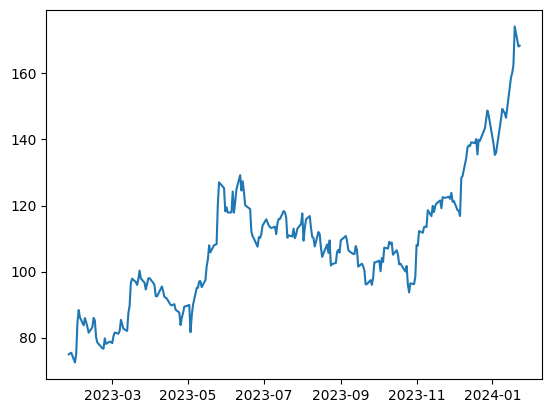

In [52]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])

In [53]:
import numpy as np

In [54]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [55]:
#Generates Time Series Data by converting it into a supervised learning problem
generator = TimeseriesGenerator(df['Close'].values, df['Close'].values, length=3, batch_size=1)

In [56]:
#Reformatting the data
dates = df.index.values[3:]
input_matrix = np.zeros((len(dates), 3))
output_matrix = np.zeros((len(dates), 1))
for i in range(generator.__len__()):
    x,y =generator.__getitem__(i)
    input_matrix[i] = x
    output_matrix[i] = y
input_matrix = input_matrix.reshape((len(dates), 3, 1))
output_matrix = output_matrix.reshape((len(dates)))


In [80]:

from sklearn.model_selection import train_test_split
X_train, temp_x_test, y_train, temp_y_test = train_test_split(input_matrix, output_matrix, test_size=0.2, shuffle=False)
X_val, X_test, y_val, y_test = train_test_split(temp_x_test, temp_y_test, test_size=0.5, shuffle=False)

dates_train = dates[:X_train.shape[0]]
dates_val = dates[X_train.shape[0]:X_train.shape[0]+X_val.shape[0]]
dates_test = dates[X_train.shape[0]+X_val.shape[0]:]


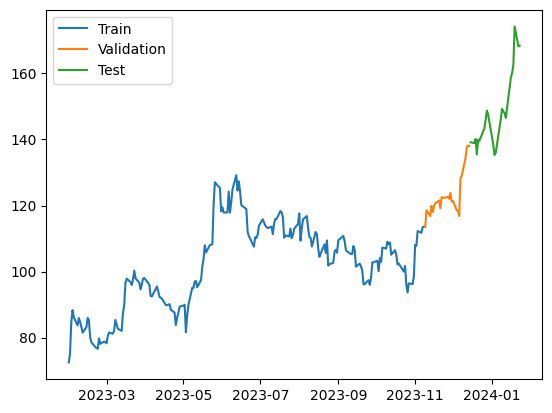

In [81]:
plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [86]:
#print X_train and y_train in a format that shows input and the corresponding output
for i in range(X_train.shape[0]):
    print('Input: ', X_train[i].flatten(), 'Output: ', y_train[i])


Input:  [74.910004 75.160004 75.400002] Output:  72.449997
Input:  [75.160004 75.400002 72.449997] Output:  75.150002
Input:  [75.400002 72.449997 75.150002] Output:  84.639999
Input:  [72.449997 75.150002 84.639999] Output:  88.309998
Input:  [75.150002 84.639999 88.309998] Output:  86.089996
Input:  [84.639999 88.309998 86.089996] Output:  83.68
Input:  [88.309998 86.089996 83.68    ] Output:  85.910004
Input:  [86.089996 83.68     85.910004] Output:  84.690002
Input:  [83.68     85.910004 84.690002] Output:  83.209999
Input:  [85.910004 84.690002 83.209999] Output:  81.480003
Input:  [84.690002 83.209999 81.480003] Output:  83.129997
Input:  [83.209999 81.480003 83.129997] Output:  85.949997
Input:  [81.480003 83.129997 85.949997] Output:  85.18
Input:  [83.129997 85.949997 85.18    ] Output:  80.080002
Input:  [85.949997 85.18     80.080002] Output:  78.5
Input:  [85.18     80.080002 78.5     ] Output:  76.769997
Input:  [80.080002 78.5      76.769997] Output:  76.610001
Input:  [7

In [82]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input

model = Sequential([

    Input(shape=(3,1)),
    LSTM(units = 64),
    Dense(units = 64, activation='relu'),
    Dense(units = 64, activation='relu'),
    Dense(units = 1)

])

model.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.0001), loss='mse', metrics=['mae'])


In [83]:
model.fit(X_train, y_train, epochs=500, validation_data=(X_val, y_val))

Epoch 1/500
7/7 [==============================] - 1s 56ms/step - loss: 10469.1191 - mae: 101.5393 - val_loss: 15250.1748 - val_mae: 123.3029
Epoch 2/500
7/7 [==============================] - 0s 3ms/step - loss: 10455.0498 - mae: 101.4698 - val_loss: 15233.5459 - val_mae: 123.2354
Epoch 3/500
7/7 [==============================] - 0s 3ms/step - loss: 10441.3896 - mae: 101.4024 - val_loss: 15217.5166 - val_mae: 123.1703
Epoch 4/500
7/7 [==============================] - 0s 3ms/step - loss: 10428.1963 - mae: 101.3375 - val_loss: 15201.9717 - val_mae: 123.1072
Epoch 5/500
7/7 [==============================] - 0s 4ms/step - loss: 10415.2871 - mae: 101.2738 - val_loss: 15186.7109 - val_mae: 123.0452
Epoch 6/500
7/7 [==============================] - 0s 3ms/step - loss: 10402.6094 - mae: 101.2108 - val_loss: 15172.1396 - val_mae: 122.9860
Epoch 7/500
7/7 [==============================] - 0s 3ms/step - loss: 10389.9414 - mae: 101.1481 - val_loss: 15157.5801 - val_mae: 122.9267
Epoch 8/500


7/7 [==============================] - 0s 641us/step


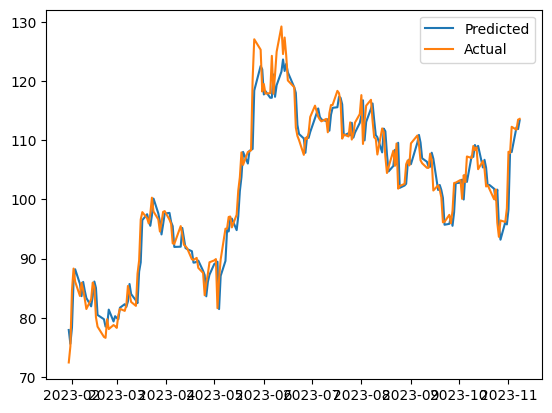

In [84]:
train_pred = model.predict(X_train)

plt.plot(dates_train, train_pred) #Predicted
plt.plot(dates_train, y_train) #Actual
plt.legend(['Predicted', 'Actual'])

1/1 [==============================] - 0s 10ms/step


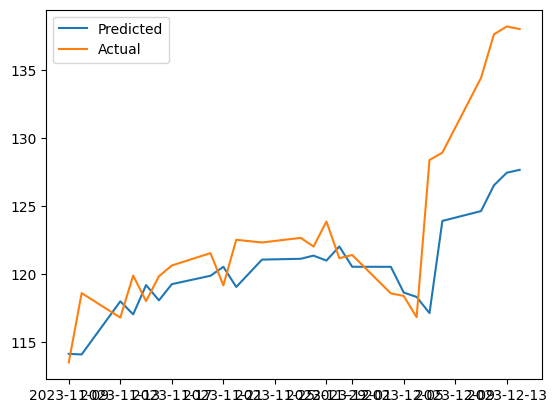

In [75]:
val_pred = model.predict(X_val)
plt.plot(dates_val, val_pred) #Predicted
plt.plot(dates_val, y_val) #Actual
plt.legend(['Predicted', 'Actual'])

1/1 [==============================] - 0s 9ms/step


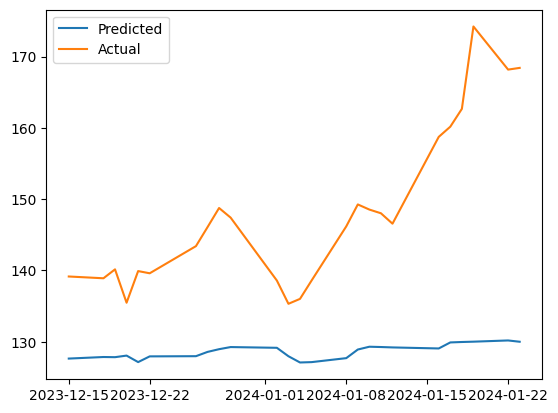

In [76]:
test_pred = model.predict(X_test)
plt.plot(dates_test, test_pred) #Predicted
plt.plot(dates_test, y_test) #Actual
plt.legend(['Predicted', 'Actual'])

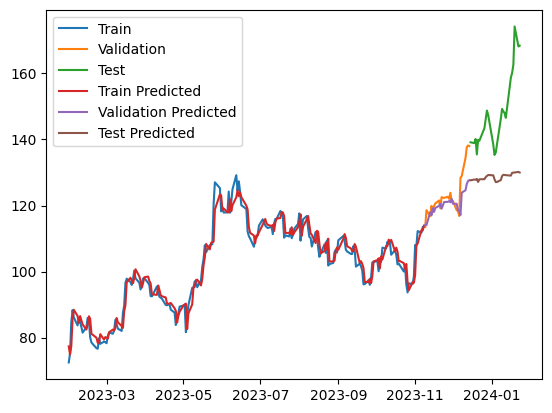

In [77]:
#plot all on the same graph
plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)
plt.plot(dates_train, train_pred)
plt.plot(dates_val, val_pred)
plt.plot(dates_test, test_pred)
plt.legend(['Train', 'Validation', 'Test', 'Train Predicted', 'Validation Predicted', 'Test Predicted'])